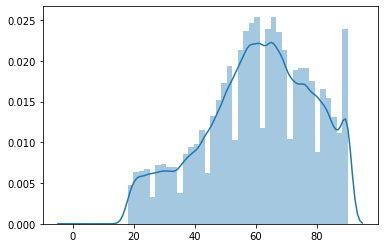

In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from algorithms.CNN_regression import convNN as CNN
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import seaborn as sns

path = "/media/jahan/solo/"
os.chdir(path)

train = "CheXpert-v1.0-small/train.csv"
valid = "CheXpert-v1.0-small/valid.csv"


labels = pd.read_csv(train)
test = pd.read_csv(valid)
paths = labels.Path
age = labels.Age
test_path = test.Path
test_age = test.Age

sns.distplot(age.values)

[7579 2024 2140 2357 2384 2875 2838 3380 3225 3424 3540 3539 3502 3783
 3911 3952 3733 3792 3800 4160 3945 4643 4735 4742 5098 5098 5033 4598
 4715 5372 4843 4813 5075 4902 4617 4637 3926 4115 4100 3665 3600 3329
 3153 2957 2677 2623 2529 2427 2185 1878 2066 1849 1929 1903 1549 1534
 1415 1400 1327 1493 1637 1312 1344 1535 1338 1326 1388 1229 1370 1279
 1287 1167  766    3]


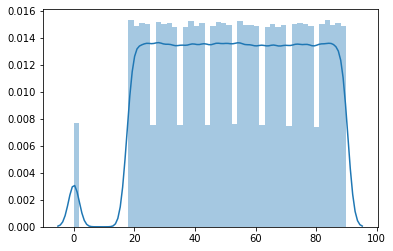

In [3]:
## oversample based on age frequency

categ = np.digitize(age.max() - age.values,bins=np.arange(0,100,step=1))
unique, counts = np.unique(categ, return_counts=True)
print(counts)
probs = np.divide((sum(counts)-counts)/sum((sum(counts)-counts)),counts)
probs = [probs[np.argwhere(unique==x)[0]][0] for x in categ]
idx = np.random.choice(np.arange(0,len(age)),size=400000,p=probs,replace=True)
sns.distplot(age.values[idx])

In [5]:
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    cnn = CNN(image_paths=paths.values[idx], 
              labels=age.values[idx],
              test_x=test.Path.values,
              test_y=test.Age.values,
              save_path="/home/jahan/Documents/CXR_CNN/output/age/")
    cnn.build()

Training using multiple GPUs..
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 16) 416         input_1[0][0]                    
__________________________________________________________________________________________________
12c (BatchNormalization)        (None, 256, 256, 16) 64          conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           12c[0][0]                        
_______________________________________________________________

In [ ]:
with strategy.scope():
    history = cnn.train(100)

Epoch 1/100
399998/400000 [============================>.] - ETA: 0s - loss: 104.9962 - mean_squared_error: 104.9968
Epoch 00001: saving model to /home/jahan/Documents/CXR_CNN/output/age//age.ckpt
400000/400000 [==============================] - 17465s 44ms/step - loss: 104.9960 - mean_squared_error: 104.9966 - val_loss: 96.5464 - val_mean_squared_error: 96.9723
Epoch 2/100
399998/400000 [============================>.] - ETA: 0s - loss: 58.6747 - mean_squared_error: 58.6749
Epoch 00002: saving model to /home/jahan/Documents/CXR_CNN/output/age//age.ckpt
400000/400000 [==============================] - 15615s 39ms/step - loss: 58.6748 - mean_squared_error: 58.6751 - val_loss: 180.7966 - val_mean_squared_error: 181.3558
Epoch 3/100
399999/400000 [============================>.] - ETA: 0s - loss: 46.6369 - mean_squared_error: 46.6369
Epoch 00003: saving model to /home/jahan/Documents/CXR_CNN/output/age//age.ckpt
400000/400000 [==============================] - 15608s 39ms/step - loss: 46.